# 2.4 Fundementals of Visualization Libraries Part 2

## 2. Import all necessary libraries and read weather and bike data set

In [1]:
#install seaborn
%pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('NY_CitiBike_2022_sampled.csv', index_col = 0)

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_time             object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,_merge
29120623,3C8AACB2D6B4349A,classic_bike,2022-12-03 00:19:08,2022-12-03 00:40:57,Irving Ave & Jefferson St,5051.02,Market St & Henry St,5270.09,40.705410,-73.925450,40.713108,-73.994460,member,2022-12-03 00:19:08,2022-12-03,10.6,both
21568440,8891065C742A0959,classic_bike,2022-09-23 17:28:00,2022-09-23 17:42:12,W 36 St & 9 Ave,6569.07,W 12 St & Hudson St,5997.10,40.754623,-73.995170,40.737530,-74.005590,member,2022-09-23 17:28:00,2022-09-23,15.1,both
23553887,44C9E5C0CE745B83,classic_bike,2022-09-02 11:48:04,2022-09-02 11:55:42,Allen St & Rivington St,5414.06,Lafayette St & E 8 St,5788.13,40.720196,-73.989975,40.730206,-73.991030,member,2022-09-02 11:48:04,2022-09-02,21.7,both
21160236,621A040D1B1CD808,electric_bike,2022-09-28 16:41:53,2022-09-28 16:41:55,West St & Liberty St,5184.08,West St & Liberty St,5184.08,40.711445,-74.014850,40.711445,-74.014850,member,2022-09-28 16:41:53,2022-09-28,17.2,both
15027579,C06B5DF339C420E1,classic_bike,2022-07-28 06:08:22,2022-07-28 06:18:50,Lewis Ave & Kosciuszko St,4617.01,Hanson Pl & Ashland Pl,4395.07,40.692345,-73.937100,40.685066,-73.977905,casual,2022-07-28 06:08:22,2022-07-28,26.7,both


## 3. Pick one theme and set it for all plots

In [3]:
#set theme
sns.set_theme(style = "ticks")

## 4. Create a bar chart of the top 20 starting stations frequencies

In [4]:
#Assign each row as value 1
df['value'] = 1

In [5]:
#Group the data for get count of the rides for each stations
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [6]:
df_t.head()

,start_station_name,value
0,1 Ave & E 110 St,4
1,1 Ave & E 16 St,20
2,1 Ave & E 18 St,21
3,1 Ave & E 30 St,18
4,1 Ave & E 39 St,23


In [7]:
#Top 20 rides base on count
top20 = df_t.nlargest(20, 'value')

In [11]:
top20

,start_station_name,value
1245,W 21 St & 6 Ave,54
1364,West St & Chambers St,45
8,1 Ave & E 68 St,40
1185,University Pl & E 14 St,39
345,Broadway & E 14 St,36
366,Broadway & W 25 St,36
376,Broadway & W 58 St,36
220,6 Ave & W 33 St,35
455,Cleveland Pl & Spring St,35
240,8 Ave & W 33 St,34


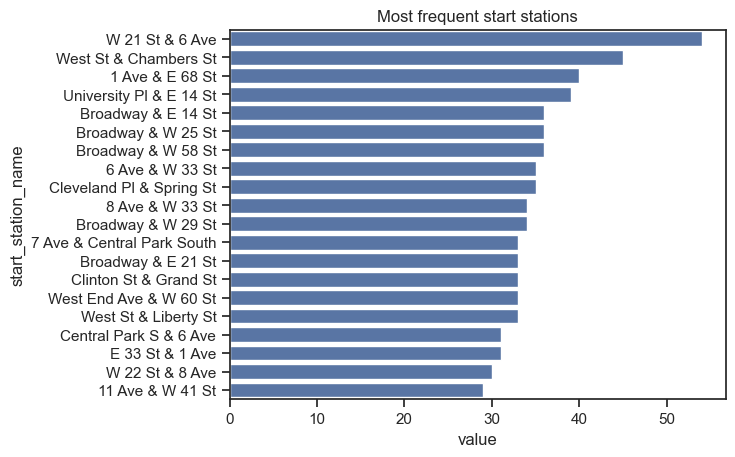

In [8]:
#Create sns barplot based on the default theme
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

### The chart above should have a raindbow colored theme since that is the default, but i'm not sure why it does that

C:\Users\bhimc\AppData\Local\Temp\ipykernel_16288\1023139022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("RdPu_r"))


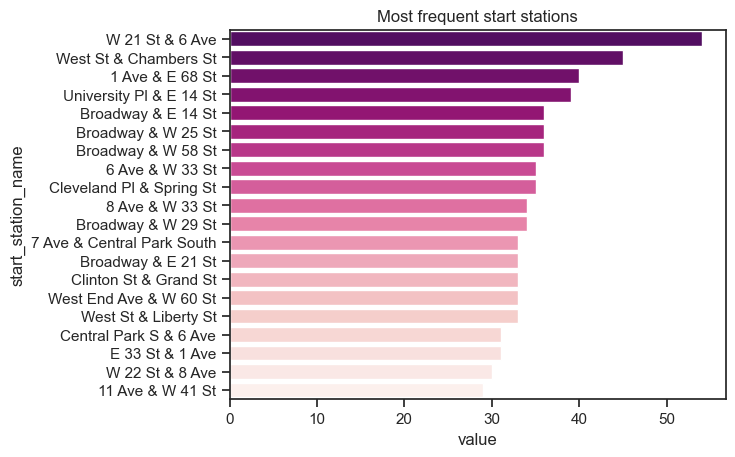

In [9]:
#change the palette to crest and do it in reverse order to show darker color for higher value
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("RdPu_r"))
plt.title("Most frequent start stations")
plt.show()

### I think the color palette I chose makes since in this graph because the higher the value is, the darker the color becomes. Violet has the highest frequency in the light color spectrum, so this color palette just makes more sense to me and is easier for me to visualize.

## 5. Recreate the dual-axis line plot using seaborn

In [10]:
#Convert date to datetime()
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [11]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [20]:
df_group.head()

,date,ride_id
0,2022-01-01,6
1,2022-01-02,17
2,2022-01-03,10
3,2022-01-04,10
4,2022-01-05,11


In [12]:
#Create a new dataframe to get daily bike rides based on temperature
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          10000
left_only         0
right_only        0
Name: count, dtype: int64
Shape of January 1st is (6, 20)
Shape of January 2nd is (17, 20)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [13]:
#Sort dataframe by date
df_temp.sort_index(inplace=True)

### Create a Line Plot using Seaborn

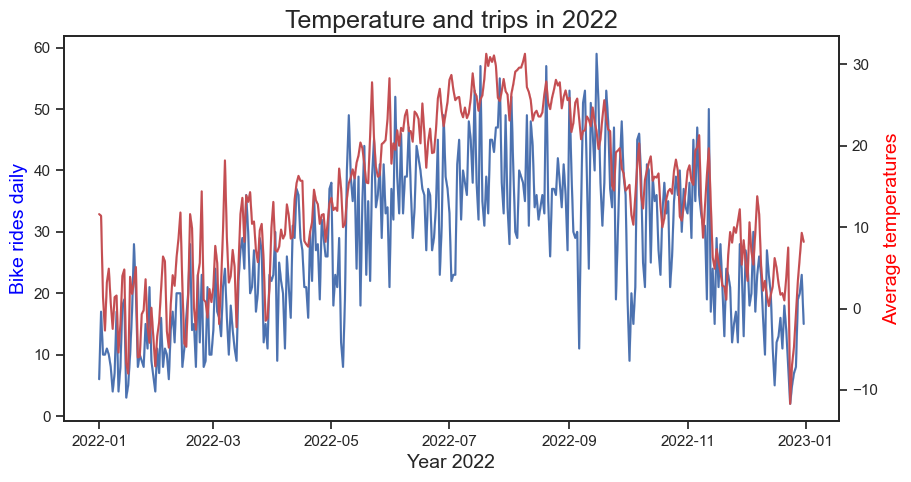

In [14]:
#Create the linechart based on sns library
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "blue", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

## 6. Make a Box plot Using Categorical Variables

In [24]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time                    object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [25]:
#check the values of 'member_casual' column
df['member_casual'].value_counts()

member_casual
member    7827
casual    2173
Name: count, dtype: int64

In [26]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

### Create a Box plots of Member_Casual and Average Temperature

C:\Users\bhimc\AppData\Local\Temp\ipykernel_16288\3835619202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'avgTemp', data = df, palette = {'member': 'darkmagenta', 'casual': 'mediumvioletred'})


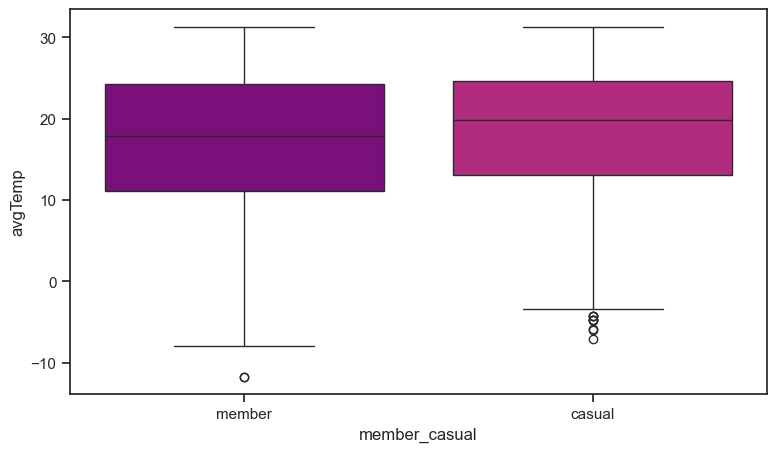

In [15]:
#Create boxplot of member_casual and average temperature
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'avgTemp', data = df, palette = {'member': 'darkmagenta', 'casual': 'mediumvioletred'})
plt.show()

### Because I don't have any other numerical factors, I compared the average temperatures between members and casual riders. I noticed that casual riders use the bikes when the weather is slightly warmer than member riders. The number of members is notably greater than the number of casual members, which may bias the results - however, the temperature range over which members ride bikes is wider than that of casual riders.  

## 7. Create a FacetGrid Plot 

In [29]:
sns.set_palette('RdPu_r')

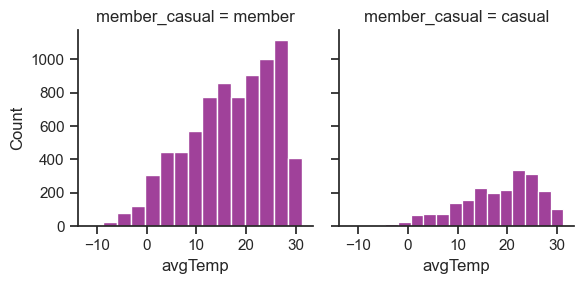

In [30]:
#Create FacetGrid
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "avgTemp", bins = 15)
plt.show()

### Looking on FacetGrid, we can tell that the use of bikes in different temperatures varies between members and casual riders. The bike ride peaks for both groups at 25 degrees and decreases as the temperature falls below zero. Because the number of member riders is large, we observe larger bars for member riders than casual riders.